In [22]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns
#Ubah jadi target 0,1,2
def convertEncoding(array_input):
    array_output = []
    for input in array_input:
        array_output.append(input.index(max(input)))
    return array_output
#Confusion matrix
#Confusion matrix
#True positive, false positive, true negative, false negative
#Catatan: baris true, column pred (ngikutin sklearn)
def getConfusionMatrix(target,prediction):
    n = len(set(target))
    confusion_matrix = [[0 for i in range(n)] for j in range(n)]
    for i in range(len(target)):
        true = int(target[i])
        pred = int(prediction[i])
        confusion_matrix[true][pred] += 1
    return np.array(confusion_matrix) 
#Accuracy,precision,recall,F1
def getAccuracy(confusion_matrix):
    total = 0
    true = 0
    for i in range(len(confusion_matrix)):
        for j in range(len(confusion_matrix[i])):
            if(i==j):
                true += confusion_matrix[i][j]
            total += confusion_matrix[i][j]
    return true/total

def getRecall(label,confusion_matrix):
    row = confusion_matrix[label,:]
    return confusion_matrix[label, label] / sum(row)

def getPrecision(label,confusion_matrix):
    column = confusion_matrix[:, label]
    return confusion_matrix[label, label] / sum(column)

def getF1(precision,recall):
    return 2*precision*recall/(precision+recall)

def getMetrics(target,prediction):
    confusion_matrix = getConfusionMatrix(target,prediction)
    n = len(set(target))
    print("Accuracy: ",getAccuracy(confusion_matrix))
    print("label precision recall f1")
    for i in range(n):
        precision = getPrecision(i, confusion_matrix)
        recall = getRecall(i, confusion_matrix)
        f1 = getF1(precision,recall)
        print(f"{i:5d} {precision:9.3f} {recall:6.3f} {f1:2.3f}")

# Nomor 2 no shuffle

In [7]:
from FFNN import FFNN
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
import random
import numpy as np
iris = datasets.load_iris()
x = iris.data.tolist()  # we only take the first two features.

y = iris.target

target2 = []
for i in range(len(y)):
    if (y[i] == 0):
        target2.append([1,0,0])
    elif(y[i] == 1):
        target2.append([0,1,0])
    else:
        target2.append([0,0,1])

ffnn2 = FFNN("IrisModel4.txt")
ffnn2.printModel()
print(ffnn2.predict([5.1, 3.5, 1.4, 0.2]))
ffnn2.setBackwardParameter(target2, 0.1)
ffnn2.backward(1, 0.1, 1000, x)

Layer 1:
Fungsi Aktivasi:  linear
Neuron 1: [0.1, 0.1, 0.1, 0.1, 0.1]
Neuron 2: [0.1, 0.1, 0.1, 0.1, 0.1]
Layer 2:
Fungsi Aktivasi:  linear
Neuron 1: [1.0, 1.0, 1.0]
Neuron 2: [1.0, 1.0, 1.0]
Neuron 3: [1.0, 1.0, 1.0]
Layer 3:
Fungsi Aktivasi:  softmax
Neuron 1: [1.0, 1.0, 1.0, 0.5]
Neuron 2: [1.0, 0.5, 0.5, 0.5]
Neuron 3: [1.0, 0.5, 0.5, 1.0]
[0.8083665327062594, 0.031658782088439814, 0.15997468520530084]
Layer 1:
Fungsi Aktivasi:  linear
Neuron 1: [0.02286998804827396, -0.21073758365443765, -0.01462371097485473, -1.1986688520280382, -0.6007971767590292]
Neuron 2: [0.20580870268621562, 0.9966961622915502, 0.5768351874302214, -0.30990620905985766, -0.34795633920263863]
Layer 2:
Fungsi Aktivasi:  linear
Neuron 1: [1.5893870929800378, 2.7080349248252755, 2.606901446097535]
Neuron 2: [-1.3366036960903271, -2.418283870044538, 0.3762439128185482]
Neuron 3: [-0.08960274400814736, 0.7770331242184626, -3.452091833742927]
Layer 3:
Fungsi Aktivasi:  softmax
Neuron 1: [2.2397254716180823, 57.7040

In [8]:
#Set classifier
clf2 = MLPClassifier(solver='adam', alpha=1e-5,hidden_layer_sizes=(15, ), random_state=1, max_iter=10000, batch_size= 1, learning_rate_init=0.03)
#Keterangan Parameter :
# solver "adam" untuk gradient descent
# hidden layer sizes sebesar 5
# max_iter, iterasi maksimum 1000
# batch_size, besar batch 10
# learning_rate_init, learning rate 

# clf.fit(X, y)
clf2.fit(x,target2)

# clf.predict([[5.4, 3.9, 1.7, 0.4],[6.5, 3. , 5.2, 2. ]])
clfResult2 = clf2.predict(x)
# print(x)
# print(target)
print(clfResult2)

[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 

In [9]:
hasil_predict_unprocessed2 = ffnn2.predictBatch(x)
hasil_predict2 = convertEncoding(hasil_predict_unprocessed2)
target_predict2 = convertEncoding(target2)
clf_result2 = convertEncoding(clfResult2.tolist())
print("Hasil predict iris model: ",hasil_predict2)
print("Hasil predict sklearn: ",clf_result2)
print("Target: ",target_predict2)

Hasil predict iris model:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Hasil predict sklearn:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Target:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

Hasil confusion matrix library sklearn
Hasil predict iris model: 
 [[50  0  0]
 [ 0 45  5]
 [ 0  0 50]]
Hasil predict model sklearn: 
 [[50  0  0]
 [ 0 46  4]
 [ 0  0 50]]
Hasil confusion matrix implementasi
Hasil predict iris model: 
 [[50  0  0]
 [ 0 45  5]
 [ 0  0 50]]
Hasil predict model sklearn: 
 [[50  0  0]
 [ 0 46  4]
 [ 0  0 50]]


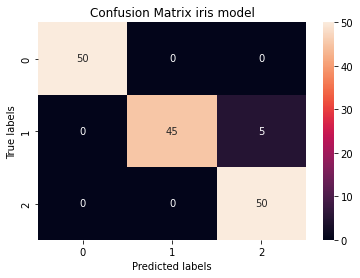

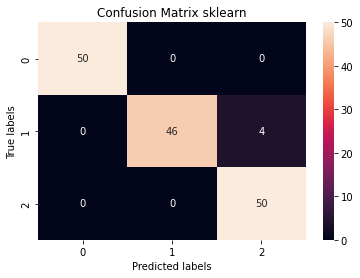

In [24]:
print("Hasil confusion matrix library sklearn")
print("Hasil predict iris model: \n",confusion_matrix(target_predict2,hasil_predict2))
print("Hasil predict model sklearn: \n",confusion_matrix(target_predict2,clf_result2))

print("Hasil confusion matrix implementasi")
print("Hasil predict iris model: \n",getConfusionMatrix(target_predict2,hasil_predict2))
print("Hasil predict model sklearn: \n",getConfusionMatrix(target_predict2,clf_result2))
ax= plt.subplot()
sns.heatmap(getConfusionMatrix(target_predict2,hasil_predict2), annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix iris model')
ax.xaxis.set_ticklabels(['0', '1','2']); ax.yaxis.set_ticklabels(['0', '1','2'])
plt.show()
ax= plt.subplot()
sns.heatmap(getConfusionMatrix(target_predict2,clf_result2), annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix sklearn')
ax.xaxis.set_ticklabels(['0', '1','2']); ax.yaxis.set_ticklabels(['0', '1','2'])
plt.show()

In [11]:
print("Hasil metric sklearn")
print("--Hasil model iris implementasi--")
print("Accuracy: ",accuracy_score(target_predict2,hasil_predict2, normalize=False))
print("Precision: ",precision_score(target_predict2,hasil_predict2, average=None))
print("Recall: ",recall_score(target_predict2,hasil_predict2, average=None))
print("F1: ",f1_score(target_predict2,hasil_predict2, average=None))
print("--Hasil model sklearn--")
print("Accuracy: ",accuracy_score(target_predict2,clf_result2, normalize=False))
print("Precision: ",precision_score(target_predict2,clf_result2, average=None))
print("Recall: ",recall_score(target_predict2,clf_result2, average=None))
print("F1: ",f1_score(target_predict2,clf_result2, average=None))

print("Hasil metric implementasi")
print("--Hasil model iris implementasi--")
getMetrics(target_predict2,hasil_predict2)
print("--Hasil model sklearn--")
getMetrics(target_predict2,clf_result2)

Hasil metric sklearn
--Hasil model iris implementasi--
Accuracy:  145
Precision:  [1.         1.         0.90909091]
Recall:  [1.  0.9 1. ]
F1:  [1.         0.94736842 0.95238095]
--Hasil model sklearn--
Accuracy:  146
Precision:  [1.         1.         0.92592593]
Recall:  [1.   0.92 1.  ]
F1:  [1.         0.95833333 0.96153846]
Hasil metric implementasi
--Hasil model iris implementasi--
Accuracy:  0.9666666666666667
label precision recall f1
    0     1.000  1.000 1.000
    1     1.000  0.900 0.947
    2     0.909  1.000 0.952
--Hasil model sklearn--
Accuracy:  0.9733333333333334
label precision recall f1
    0     1.000  1.000 1.000
    1     1.000  0.920 0.958
    2     0.926  1.000 0.962


# Nomor3

In [12]:
from FFNN import FFNN
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
import random
import numpy as np
iris = datasets.load_iris()
x = iris.data.tolist()  # we only take the first two features.

y = iris.target

target = []
for i in range(len(y)):
    if (y[i] == 0):
        target.append([1,0,0])
    elif(y[i] == 1):
        target.append([0,1,0])
    else:
        target.append([0,0,1])


data = []
for i in range(len(x)):
    data.append((x[i],target[i]))

trainingLen = (len(data) * 9) // 10
testLen = len(data) - trainingLen

random.seed(0)
random.shuffle(data)
x = []
target = []
x_test = []
target_test = []
for d in range (len(data)):
    if (d < trainingLen):
        x.append(data[d][0])
        target.append(data[d][1])
    else:
        x_test.append(data[d][0])
        target_test.append(data[d][1])

In [13]:
ffnn = FFNN("IrisModel4.txt")
ffnn.printModel()
ffnn.setBackwardParameter(target, 0.1)
ffnn.backward(1, 0.1, 1000, x)

Layer 1:
Fungsi Aktivasi:  linear
Neuron 1: [0.1, 0.1, 0.1, 0.1, 0.1]
Neuron 2: [0.1, 0.1, 0.1, 0.1, 0.1]
Layer 2:
Fungsi Aktivasi:  linear
Neuron 1: [1.0, 1.0, 1.0]
Neuron 2: [1.0, 1.0, 1.0]
Neuron 3: [1.0, 1.0, 1.0]
Layer 3:
Fungsi Aktivasi:  softmax
Neuron 1: [1.0, 1.0, 1.0, 0.5]
Neuron 2: [1.0, 0.5, 0.5, 0.5]
Neuron 3: [1.0, 0.5, 0.5, 1.0]
Layer 1:
Fungsi Aktivasi:  linear
Neuron 1: [0.5257120832629552, 1.2361772108341045, 0.9625620025604665, -0.9472367533864436, -1.209726023999975]
Neuron 2: [0.46970020941141294, 0.8718934638075373, 0.768886726775412, -1.0316665816713222, -1.1917885167181452]
Layer 2:
Fungsi Aktivasi:  linear
Neuron 1: [2.4616323804598075, 1.6777922036609725, 0.6176249145472962]
Neuron 2: [1.212881510915601, 2.1895384380213705, -0.19079671608845014]
Neuron 3: [-1.0706638945059965, -3.091381285263246, 1.5639771660118813]
Layer 3:
Fungsi Aktivasi:  softmax
Neuron 1: [-13.947642028865502, 20.10555550068345, 15.108782873057232, 29.86983792688108]
Neuron 2: [15.5093393

In [14]:
#Set classifier
clf = MLPClassifier(solver='adam', alpha=1e-5,hidden_layer_sizes=(5, ), random_state=1, max_iter=10000, batch_size= 1, learning_rate_init=0.03)
#Keterangan Parameter :
# solver "adam" untuk gradient descent
# hidden layer sizes sebesar 5
# max_iter, iterasi maksimum 1000
# batch_size, besar batch 10
# learning_rate_init, learning rate 

# clf.fit(X, y)
clf.fit(x,target)

# clf.predict([[5.4, 3.9, 1.7, 0.4],[6.5, 3. , 5.2, 2. ]])
clfResult = clf.predict(x_test)
# print(x)
# print(target)
print(clfResult)

[[0 0 1]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]]


In [15]:
ffnn.printModel()
count = 0
for i in range(len(x_test)):
    pred = np.round(np.array(ffnn.predict(x_test[i]))).tolist()
    print("IrisModel: ", pred, "target: ", target_test[i])
    if (pred == target_test[i]):
        count+=1
print(f"IrisModel Correct count: {count}/{len(x_test)}")

Layer 1:
Fungsi Aktivasi:  linear
Neuron 1: [0.5257120832629552, 1.2361772108341045, 0.9625620025604665, -0.9472367533864436, -1.209726023999975]
Neuron 2: [0.46970020941141294, 0.8718934638075373, 0.768886726775412, -1.0316665816713222, -1.1917885167181452]
Layer 2:
Fungsi Aktivasi:  linear
Neuron 1: [2.4616323804598075, 1.6777922036609725, 0.6176249145472962]
Neuron 2: [1.212881510915601, 2.1895384380213705, -0.19079671608845014]
Neuron 3: [-1.0706638945059965, -3.091381285263246, 1.5639771660118813]
Layer 3:
Fungsi Aktivasi:  softmax
Neuron 1: [-13.947642028865502, 20.10555550068345, 15.108782873057232, 29.86983792688108]
Neuron 2: [15.509339313215024, 10.061765266851907, -5.612720718689057, 3.114035278567247]
Neuron 3: [1.4383027156518478, -28.167320767534093, -7.496062154367859, -30.983873205449544]
IrisModel:  [0.0, 0.0, 1.0] target:  [0, 0, 1]
IrisModel:  [0.0, 0.0, 1.0] target:  [0, 1, 0]
IrisModel:  [1.0, 0.0, 0.0] target:  [1, 0, 0]
IrisModel:  [0.0, 0.0, 1.0] target:  [0, 0,

In [16]:

hasil_predict_unprocessed = ffnn.predictBatch(x_test)
hasil_predict = convertEncoding(hasil_predict_unprocessed)
target_predict = convertEncoding(target_test)
clf_result = convertEncoding(clfResult.tolist())
print("Hasil predict iris model: ",hasil_predict)
print("Hasil predict sklearn: ",clf_result)
print("Target: ",target_predict)

Hasil predict iris model:  [2, 2, 0, 2, 1, 1, 2, 1, 2, 2, 2, 1, 0, 2, 1]
Hasil predict sklearn:  [2, 1, 0, 1, 1, 1, 2, 1, 2, 2, 2, 1, 0, 2, 1]
Target:  [2, 1, 0, 2, 1, 1, 2, 1, 2, 2, 2, 1, 0, 2, 1]


Hasil confusion matrix library sklearn
Hasil predict iris model: 
 [[2 0 0]
 [0 5 1]
 [0 0 7]]
Hasil predict model sklearn: 
 [[2 0 0]
 [0 6 0]
 [0 1 6]]
Hasil confusion matrix implementasi
Hasil predict iris model: 
 [[2 0 0]
 [0 5 1]
 [0 0 7]]
Hasil predict model sklearn: 
 [[2 0 0]
 [0 6 0]
 [0 1 6]]


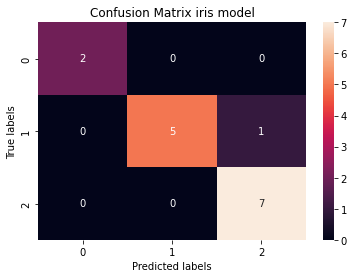

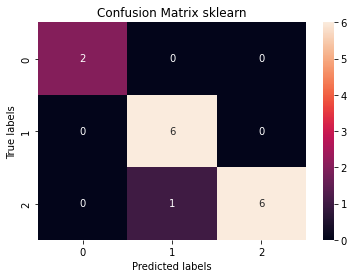

In [26]:
print("Hasil confusion matrix library sklearn")
print("Hasil predict iris model: \n",confusion_matrix(target_predict,hasil_predict))
print("Hasil predict model sklearn: \n",confusion_matrix(target_predict,clf_result))
print("Hasil confusion matrix implementasi")
print("Hasil predict iris model: \n",getConfusionMatrix(target_predict,hasil_predict))
print("Hasil predict model sklearn: \n",getConfusionMatrix(target_predict,clf_result))
ax= plt.subplot()
sns.heatmap(getConfusionMatrix(target_predict,hasil_predict), annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix iris model')
ax.xaxis.set_ticklabels(['0', '1','2']); ax.yaxis.set_ticklabels(['0', '1','2'])
plt.show()
ax= plt.subplot()
sns.heatmap(getConfusionMatrix(target_predict,clf_result), annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix sklearn')
ax.xaxis.set_ticklabels(['0', '1','2']); ax.yaxis.set_ticklabels(['0', '1','2'])
plt.show()

In [27]:
print("Hasil metric sklearn")
print("--Hasil model iris implementasi--")
print("Accuracy: ",accuracy_score(target_predict,hasil_predict, normalize=False))
print("Precision: ",precision_score(target_predict,hasil_predict, average=None))
print("Recall: ",recall_score(target_predict,hasil_predict, average=None))
print("F1: ",f1_score(target_predict,hasil_predict, average=None))
print("--Hasil model sklearn--")
print("Accuracy: ",accuracy_score(target_predict,clf_result, normalize=False))
print("Precision: ",precision_score(target_predict,clf_result, average=None))
print("Recall: ",recall_score(target_predict,clf_result, average=None))
print("F1: ",f1_score(target_predict,clf_result, average=None))

Hasil metric sklearn
--Hasil model iris implementasi--
Accuracy:  14
Precision:  [1.    1.    0.875]
Recall:  [1.         0.83333333 1.        ]
F1:  [1.         0.90909091 0.93333333]
--Hasil model sklearn--
Accuracy:  14
Precision:  [1.         0.85714286 1.        ]
Recall:  [1.         1.         0.85714286]
F1:  [1.         0.92307692 0.92307692]


In [28]:
print("Hasil metric implementasi")
print("--Hasil model iris implementasi--")
getMetrics(target_predict,hasil_predict)
print("--Hasil model sklearn--")
getMetrics(target_predict,clf_result)

Hasil metric implementasi
--Hasil model iris implementasi--
Accuracy:  0.9333333333333333
label precision recall f1
    0     1.000  1.000 1.000
    1     1.000  0.833 0.909
    2     0.875  1.000 0.933
--Hasil model sklearn--
Accuracy:  0.9333333333333333
label precision recall f1
    0     1.000  1.000 1.000
    1     0.857  1.000 0.923
    2     1.000  0.857 0.923
